## **Dashboard with Plotly Dash**

Before launching, you must download the latest versions of Panda, Dash and its components in advance

In [1]:
#conda install dash or pip install dash
#conda install dash_core_components or pip install dash_core_components
#conda install dash_html_components or pip install dash_html_components
#conda install pandas or pip install pandas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import wget
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [4]:
print('Dash version: ', dash.__version__)
print('Dash_core_components version: ', dcc.__version__)
print('Dash_html_components version: ', html.__version__)
print('Dash version: ', pd.__version__)

Dash version:  2.14.2
Dash_core_components version:  2.12.1
Dash_html_components version:  2.0.15
Dash version:  2.1.1


In [5]:
spacex_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv')

100% [................................................................................] 2476 / 2476

In [6]:
spacex_df = pd.read_csv(spacex_file)
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard', 
                                        style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40},
                                       ),
                                dcc.Dropdown(id='site-dropdown', 
                                             options=[{'label': 'All Sites',     'value': 'ALL'},
                                                      {'label': 'CCAFS LC-40',   'value': 'CCAFS LC-40'},
                                                      {'label': 'CCAFS SLC-40',  'value': 'CCAFS SLC-40'},
                                                      {'label': 'KSC LC-39A',    'value': 'KSC LC-39A'},
                                                      {'label': 'VAFB SLC-4E',   'value': 'VAFB SLC-4E'},
                                                      ],
                                              searchable=True,
                                              placeholder='Select a Launch Site here',
                                              style={'width': '80%', 'padding': '3px','font-size': '20px', 'text-align-last': 'center'},
                                            ),
                                html.Br(),

                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                dcc.RangeSlider(id='payload-slider', 
                                                min=0, 
                                                max=10000,
                                                step=1000, 
                                                value=[min_payload, max_payload]),
                               
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                               ])
                
@app.callback(Output(component_id='success-pie-chart', component_property='figure'), 
              Input(component_id='site-dropdown', component_property='value'))
            
def get_graph(site_dropdown):
    if site_dropdown == 'ALL':
        piechart = px.pie(spacex_df,values='class', names='Launch Site', title="Success Launches for All Sites") 
        return piechart
    else:
        filtered_df= spacex_df[spacex_df['Launch Site'] == site_dropdown]
        filtered_df= filtered_df.groupby(['Launch Site', 'class']).size().reset_index(name='class count')
        piechart = px.pie(filtered_df, values='class count', names='class', title=f"Success Launches for site {site_dropdown}")
        return piechart

@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'),
              Input(component_id='payload-slider', component_property='value'))

def get_scatter(site_dropdown, slider_range):
    low, high = slider_range
    mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
    filtered_df = spacex_df[mask] 
    if site_dropdown == 'ALL':
        filtered_df = spacex_df[spacex_df['Launch Site'] == site_dropdown]
        filtered_ddf = pd.DataFrame(filtered_df['Launch Site'])
        fig = px.scatter(filtered_df, x="Payload Mass (kg)", y="class", color="Booster Version Category", title="Payload vs Outcome for All Sites")
        return fig
    else:
        filtered_df1 = filtered_df[filtered_df['Launch Site'] == site_dropdown]
        filtered_ddf1 = pd.DataFrame(filtered_df1['Launch Site'])
        fig = px.scatter(filtered_df1, x="Payload Mass (kg)", y="class", color="Booster Version Category", title=f"Payload and Booster Versions for site {site_dropdown}")
        return fig
    
if __name__ == '__main__':
    app.run_server()

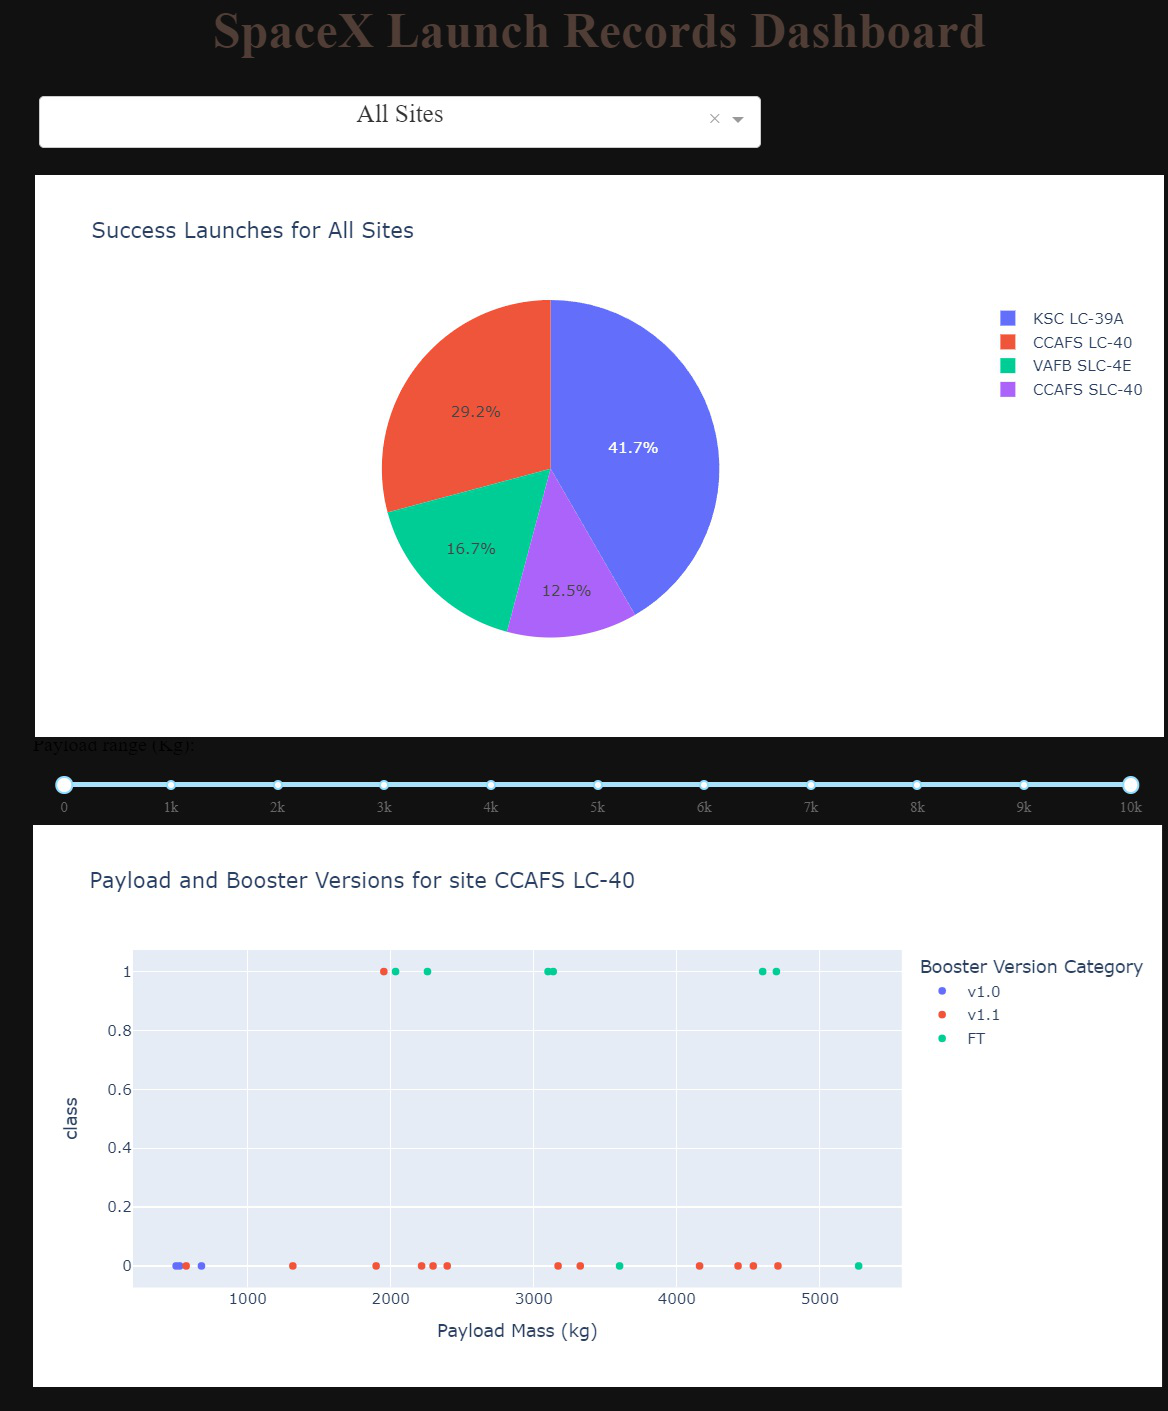

In [8]:
from PIL import Image
Image.open('result.jpg')